## K-Nearest Neighbors

K-Nearest Neighbors (k-NN) takes the nearest k neighbours of a given sample and assigns the most common label to the sample. To test its effectiveness, I have decided to test the cole dataset with multiples of 3 from 3-NN to 15-NN.

3-nearest neighbours


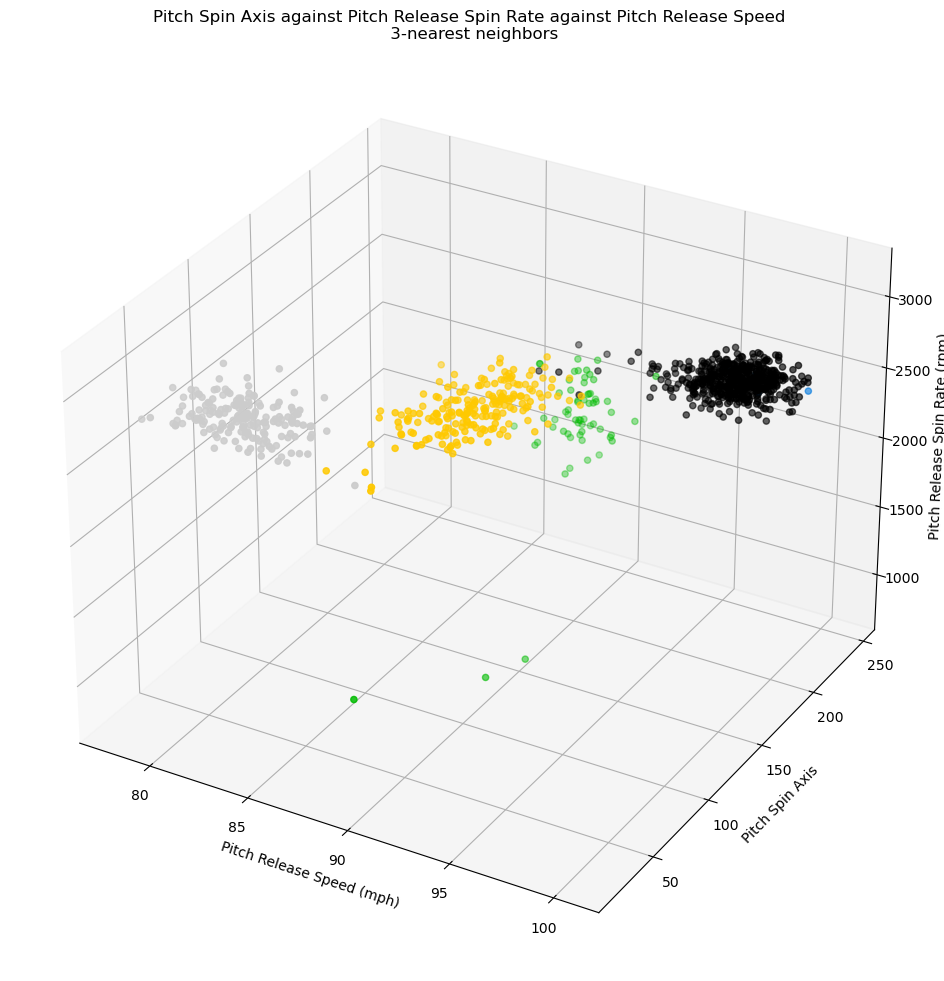

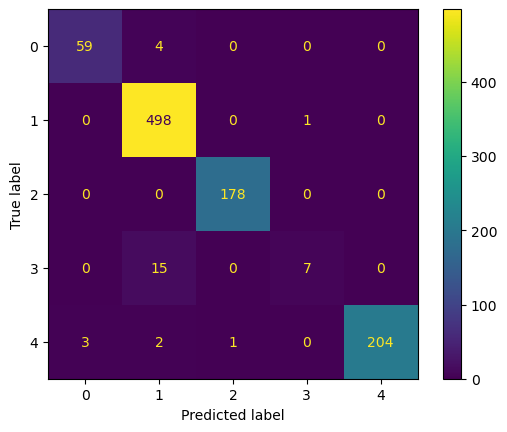

ACCURACY - 97.32510288065843% of samples accurately predicted


6-nearest neighbours


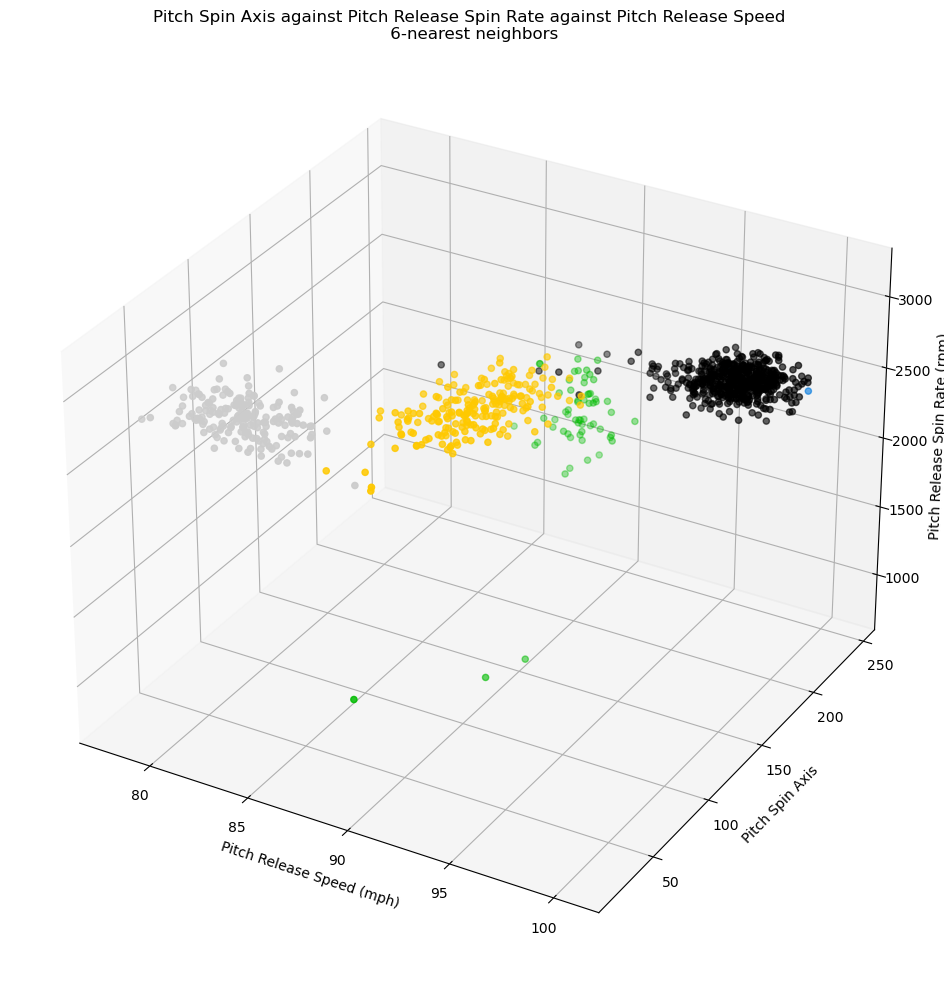

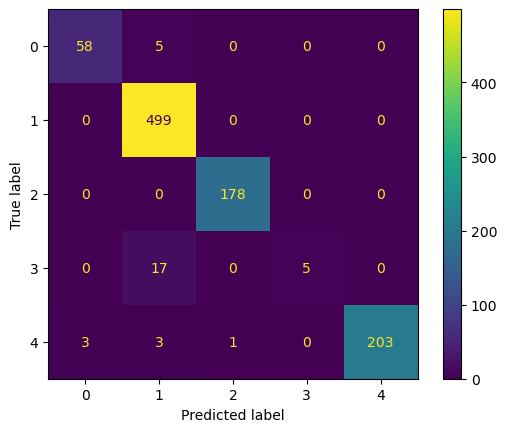

ACCURACY - 97.0164609053498% of samples accurately predicted


9-nearest neighbours


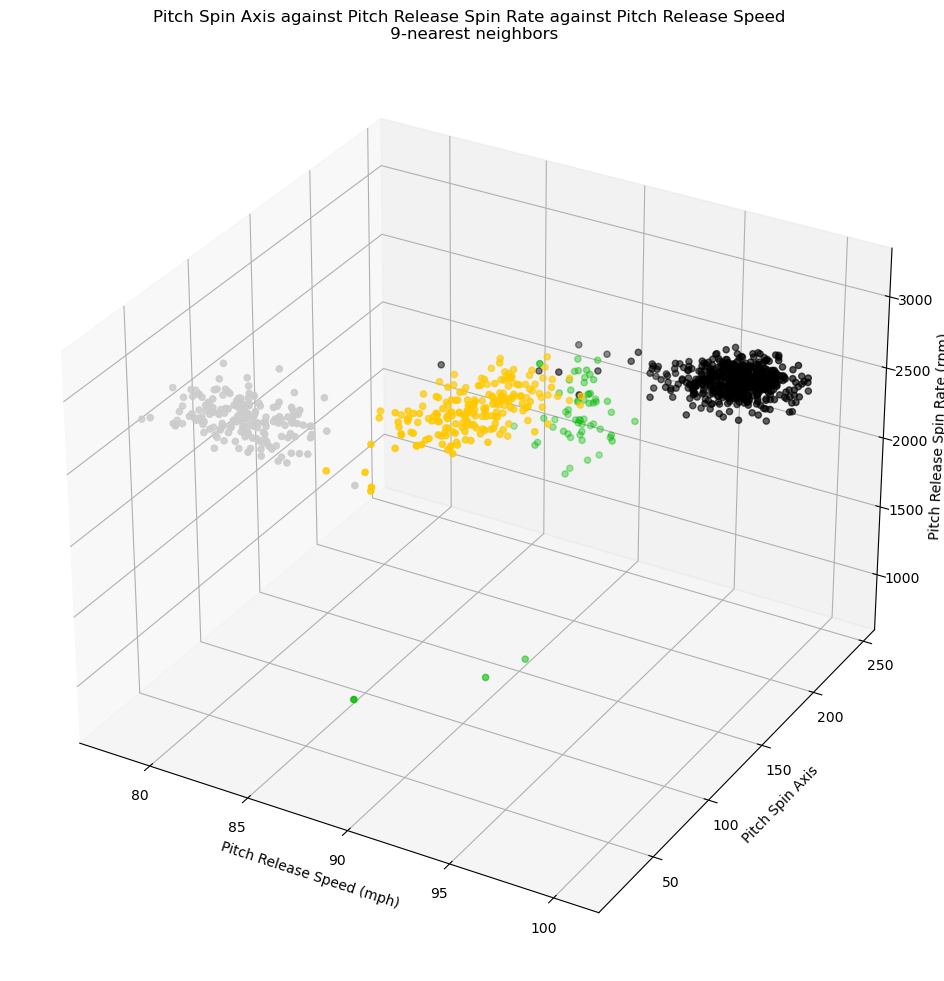

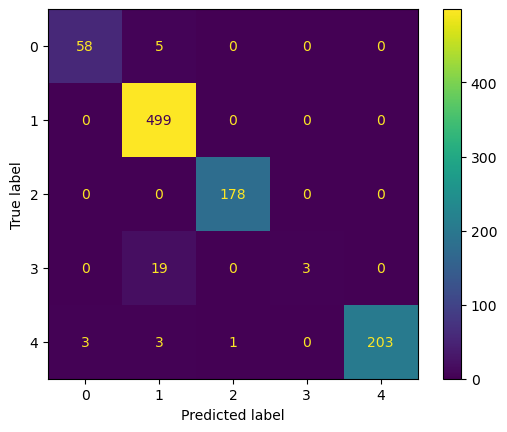

ACCURACY - 96.81069958847736% of samples accurately predicted


12-nearest neighbours


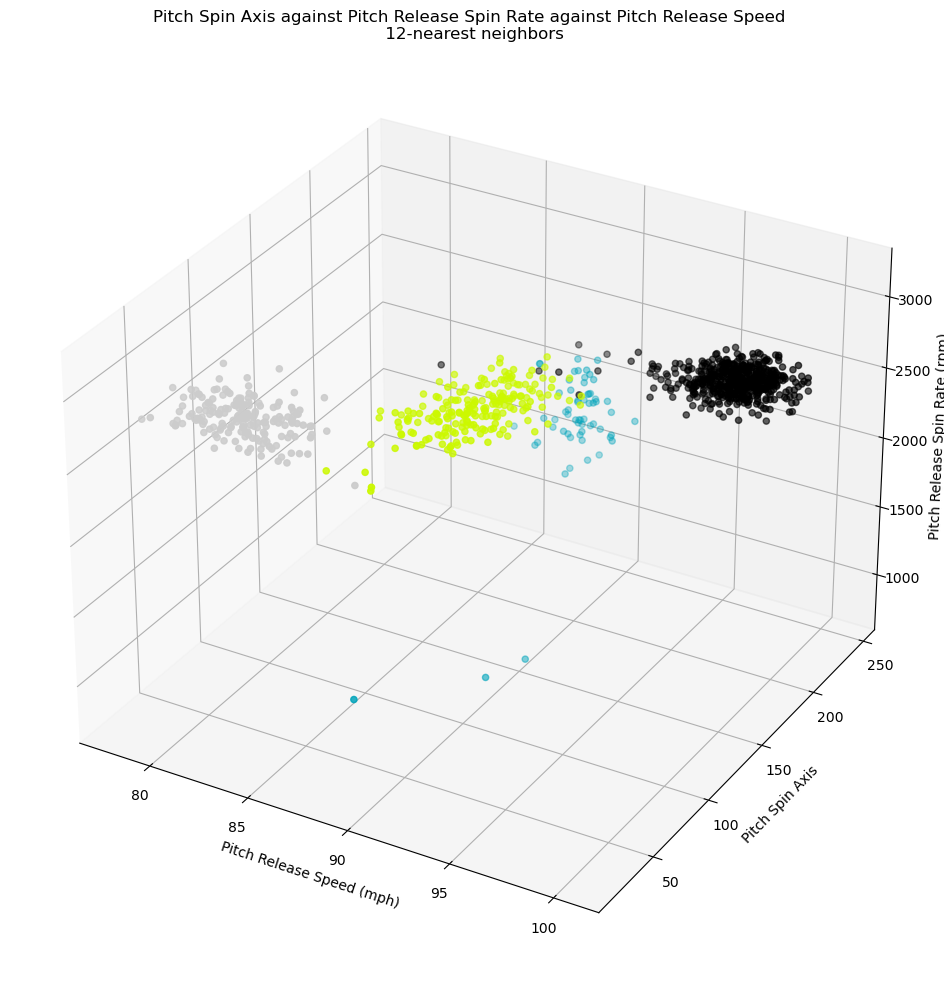

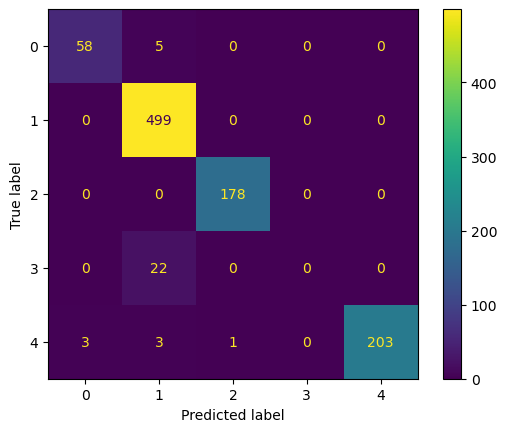

ACCURACY - 96.50205761316872% of samples accurately predicted


15-nearest neighbours


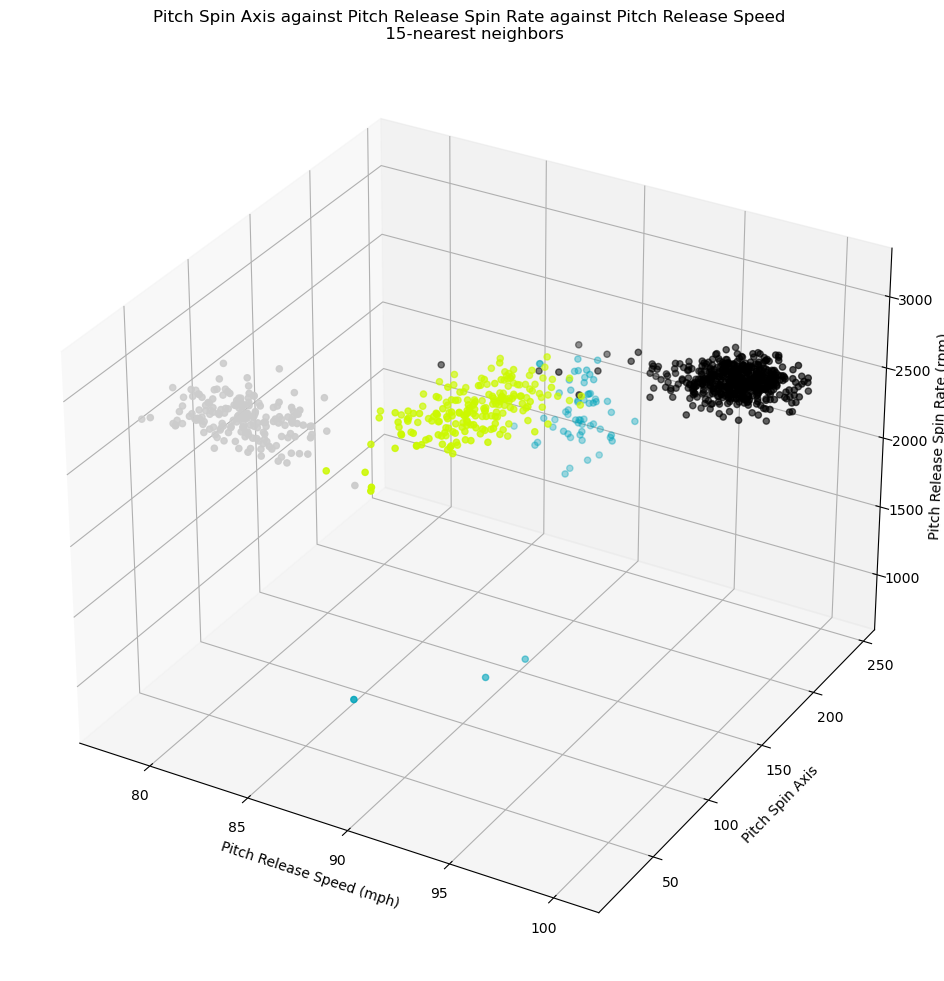

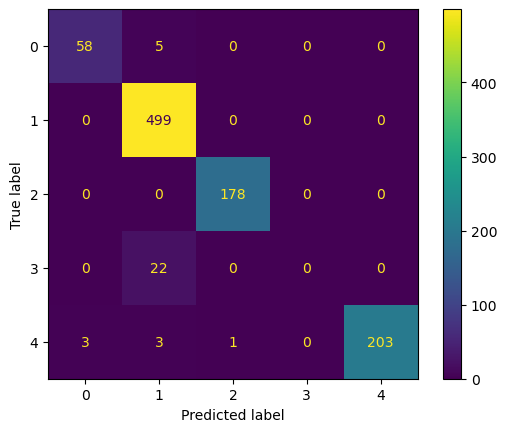

ACCURACY - 96.50205761316872% of samples accurately predicted




In [185]:
for i in range(3,16,3):
    print(f'{i}-nearest neighbours')
    model151 = neighbors.KNeighborsClassifier(n_neighbors = i)
    model151.fit(coleTrainX3,coleTrainY3)
    model151Labels = model151.predict(coleTestX3)
    
    pitchDict = {p:i for i,p in enumerate(set(model151Labels))}

    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(coleTestX3['release_speed'], coleTestX3['spin_axis'], coleTestX3['release_spin_rate'], c = [pitchDict[p] for p in model151Labels], cmap = 'nipy_spectral')
    ax.set_title(f'Pitch Spin Axis against Pitch Release Spin Rate against Pitch Release Speed \n {i}-nearest neighbors')
    ax.set_xlabel('Pitch Release Speed (mph)')
    ax.set_zlabel('Pitch Release Spin Rate (rpm)')
    ax.set_ylabel('Pitch Spin Axis')
    fig.set_size_inches(12, 12)
    plt.show()
    
    printMetrics(coleTestYAct3,model151Labels)
    print()
    print()

k-NN seems to very very good at predicting pitches with all tests having a 95% accuracy score or better. Despite this, it is unable to predict less frequently used pitches with similar attributes to more frequently used pitches. To see if a larger sample size helps accuracy, we will use a new dataset, coleExt, which is Gerrit Cole's pitching data from 2015 to 2022.

In [168]:
coleExt = getPitcherData(543037,[2015,2022])

Gathering Player Data


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/pybaseball/utils.py:295: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))


In [172]:
coleExt

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0            KC  2020-10-09           83.0          -1.91           5.79   
1            CH  2020-10-09           91.2          -1.94           5.45   
2            FF  2020-10-09           98.3          -2.11           5.54   
3            FF  2020-10-09           96.4          -2.06           5.45   
4            FF  2020-10-09           97.6          -1.93           5.58   
...         ...         ...            ...            ...            ...   
6709         CH  2021-04-01           87.8          -1.90           5.60   
6710         KC  2021-04-01           82.2          -1.89           5.82   
6711         FF  2021-04-01           96.6          -1.83           5.81   
6712         FF  2021-04-01           95.3          -1.78           5.79   
6713         FF  2021-04-01           97.7          -2.05           5.82   

       player_name  batter  pitcher     events    description  ...  fld_score  \
0     Cole, Gerrit  668227   543037  field_out  hit_into_play  ...          1   
1     Cole, Gerrit  664040   543037  field_out  hit_into_play  ...          1   
2     Cole, Gerrit  664040   543037        NaN           ball  ...          1   
3     Cole, Gerrit  640457   543037   home_run  hit_into_play  ...          1   
4     Cole, Gerrit  640457   543037        NaN           ball  ...          1   
...            ...     ...      ...        ...            ...  ...        ...   
6709  Cole, Gerrit  624415   543037        NaN           foul  ...          0   
6710  Cole, Gerrit  624415   543037        NaN           ball  ...          0   
6711  Cole, Gerrit  624415   543037        NaN  called_strike  ...          0   
6712  Cole, Gerrit  543760   543037  field_out  hit_into_play  ...          0   
6713  Cole, Gerrit  543760   543037        NaN           ball  ...          0   

      post_away_score  post_home_score  post_bat_score  post_fld_score  \
0                   1                1               1               1   
1                   1                1               1               1   
2                   1                1               1               1   
3                   1                1               1               1   
4                   1                0               0               1   
...               ...              ...             ...             ...   
6709                0                0               0               0   
6710                0                0               0               0   
6711                0                0               0               0   
6712                0                0               0               0   
6713                0                0               0               0   

     if_fielding_alignment of_fielding_alignment spin_axis delta_home_win_exp  \
0                 Standard              Standard      51.0             -0.033   
1            Infield shift              Standard     241.0             -0.014   
2            Infield shift              Standard     223.0              0.000   
3            Infield shift              Standard     221.0              0.165   
4            Infield shift              Standard     213.0              0.000   
...                    ...                   ...       ...                ...   
6709         Infield shift              Standard     242.0              0.000   
6710         Infield shift              Standard      29.0              0.000   
6711         Infield shift              Standard     209.0              0.000   
6712         Infield shift              Standard     209.0              0.022   
6713         Infield shift              Standard     208.0              0.000   

     delta_run_exp  
0           -0.251  
1           -0.129  
2            0.018  
3            1.004  
4            0.013  
...            ...  
6709        -0.043  
6710         0.021  
6711        -0.027  
6712        -0.280  
6713         0.038  

[203

*coleExt dataset after being sanitised*

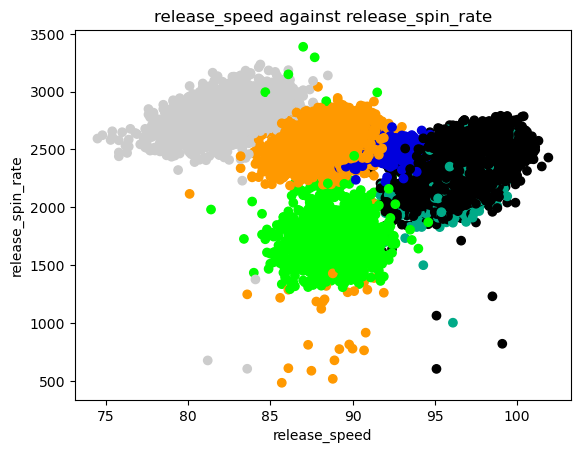

In [173]:
createPlot(coleExt,'release_speed','release_spin_rate')

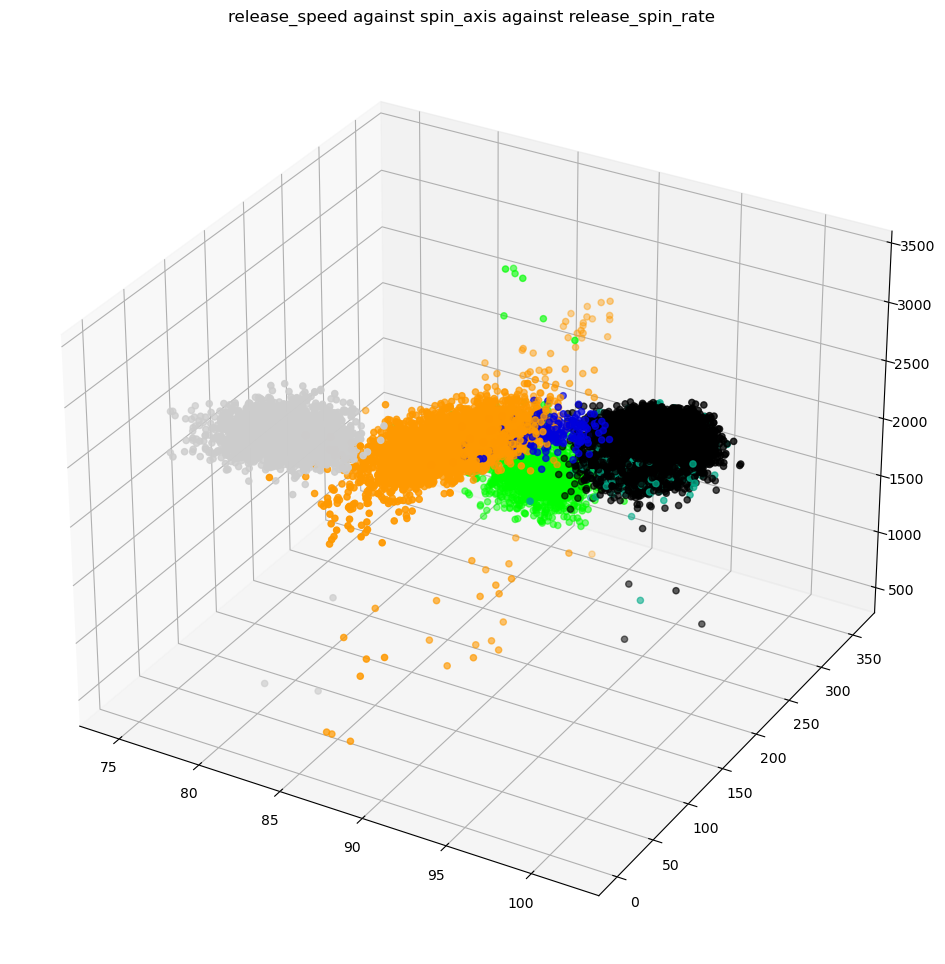

In [174]:
createPlot3d(coleExt,'release_speed','spin_axis','release_spin_rate')

*Visualisations of the coleExt dataset in 2D and 3D*

In [181]:
coleTrainX4, coleTestX4, coleTrainY4, coleTestY4Act = getData(coleExt,['spin_axis','release_spin_rate','release_speed'],'pitch_type',0.25)

3-nearest neighbours


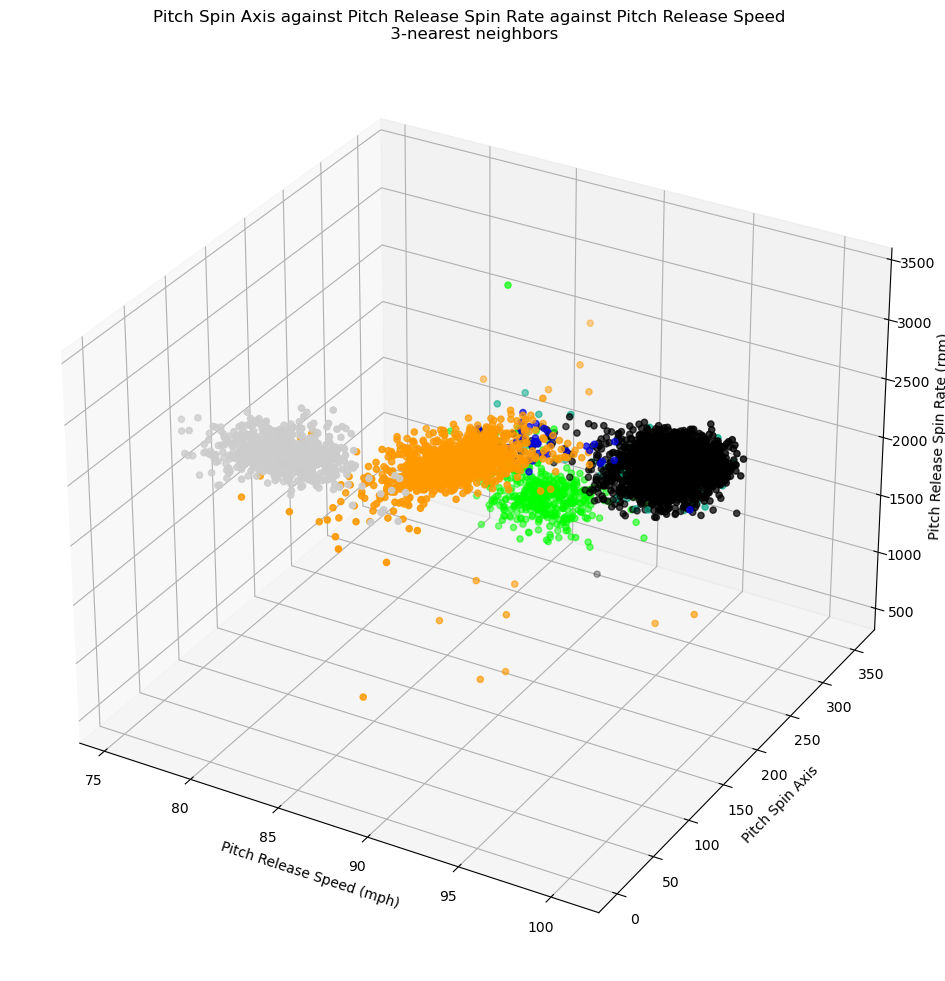

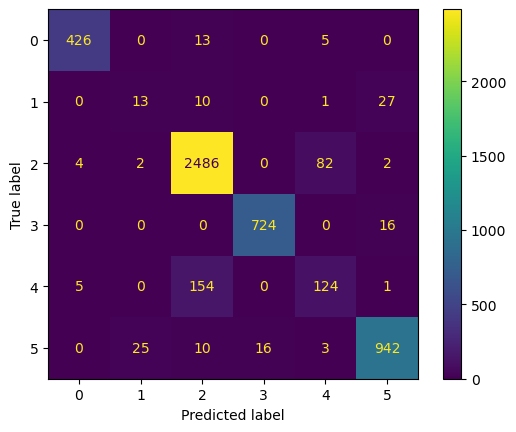

ACCURACY - 92.61441759968572% of samples accurately predicted


6-nearest neighbours


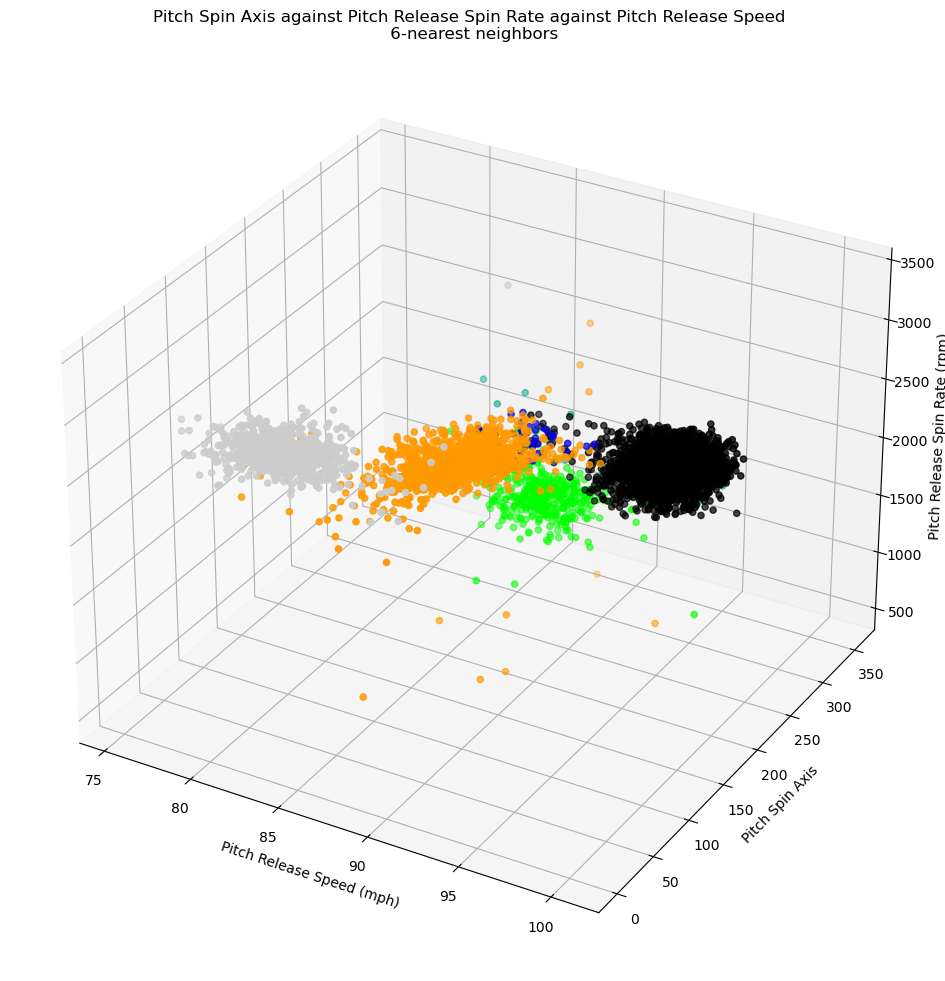

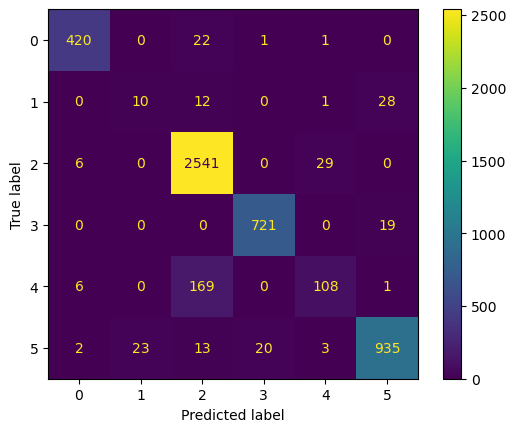

ACCURACY - 93.007267727362% of samples accurately predicted


9-nearest neighbours


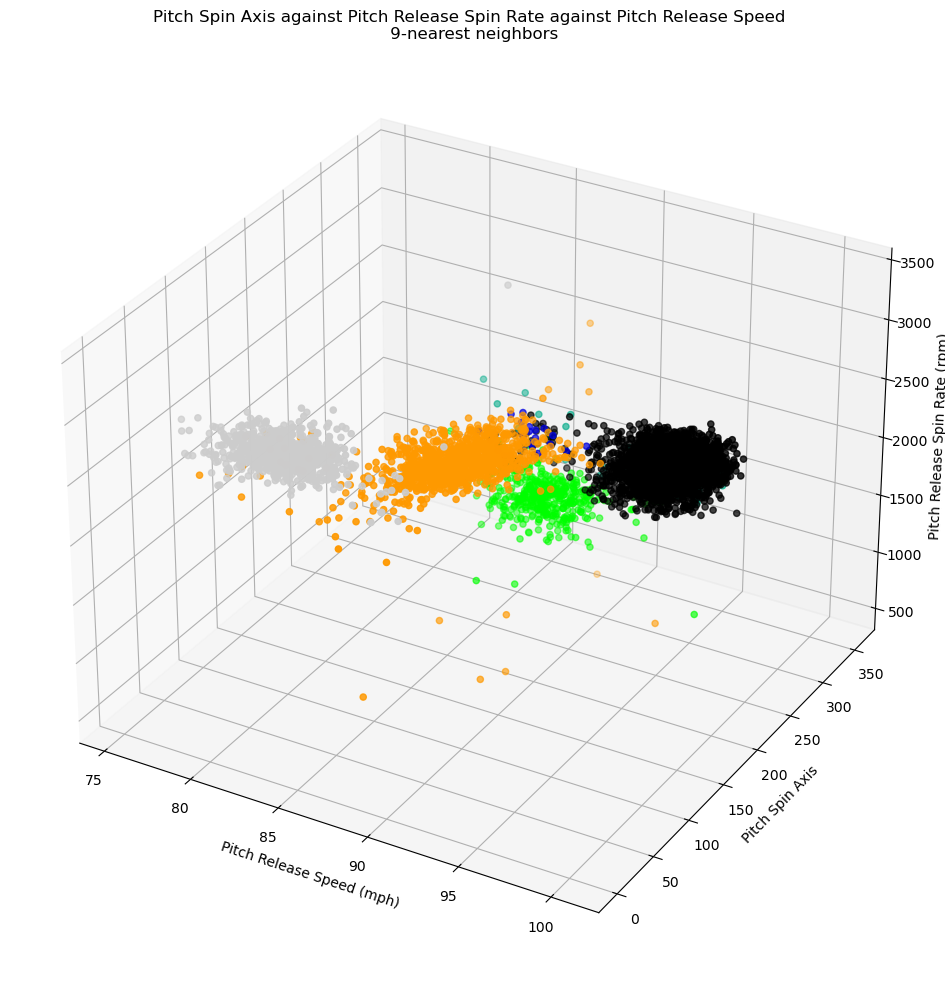

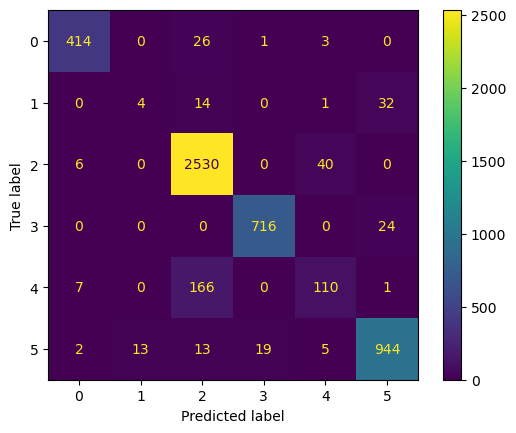

ACCURACY - 92.67334511883716% of samples accurately predicted


12-nearest neighbours


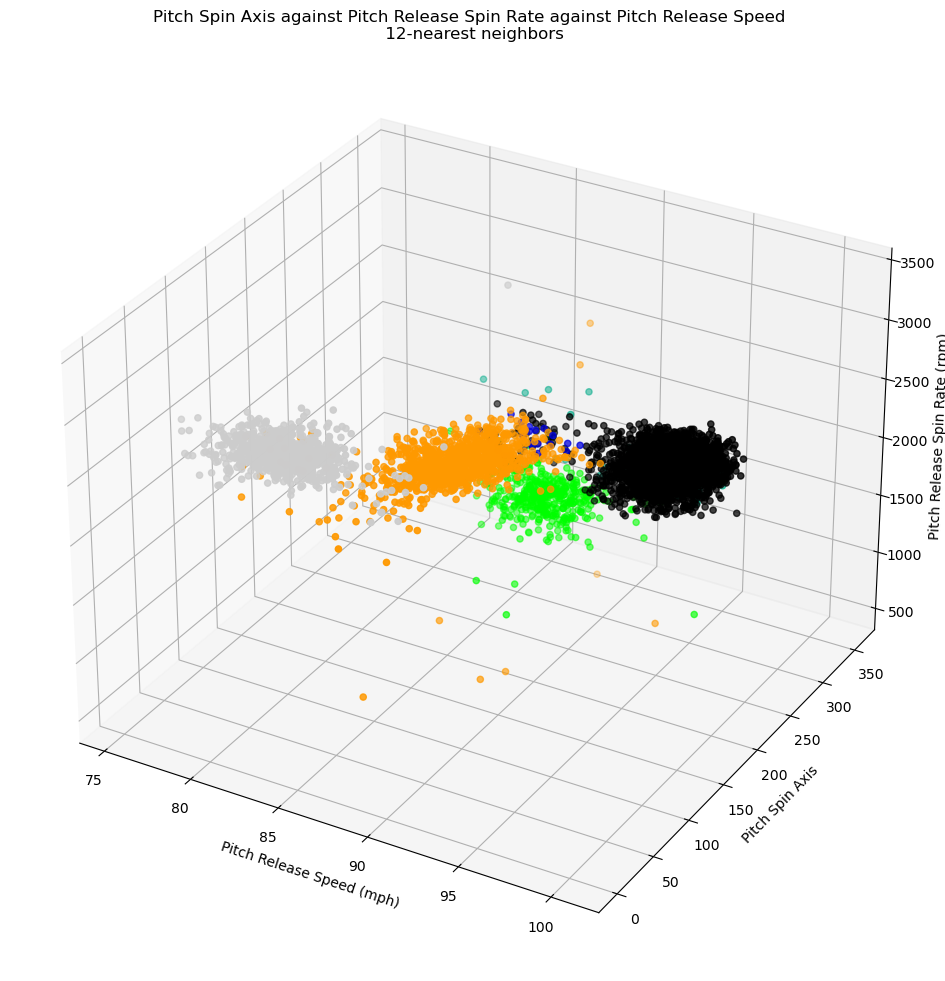

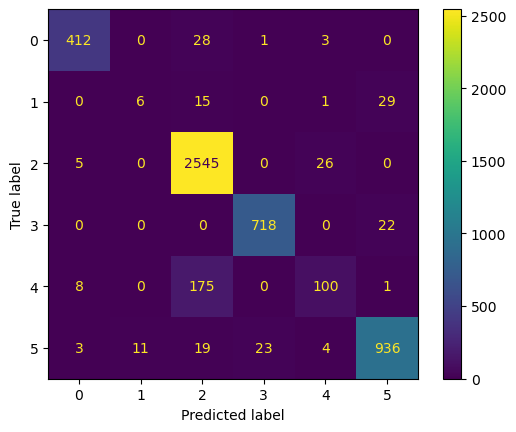

ACCURACY - 92.65370261245334% of samples accurately predicted


15-nearest neighbours


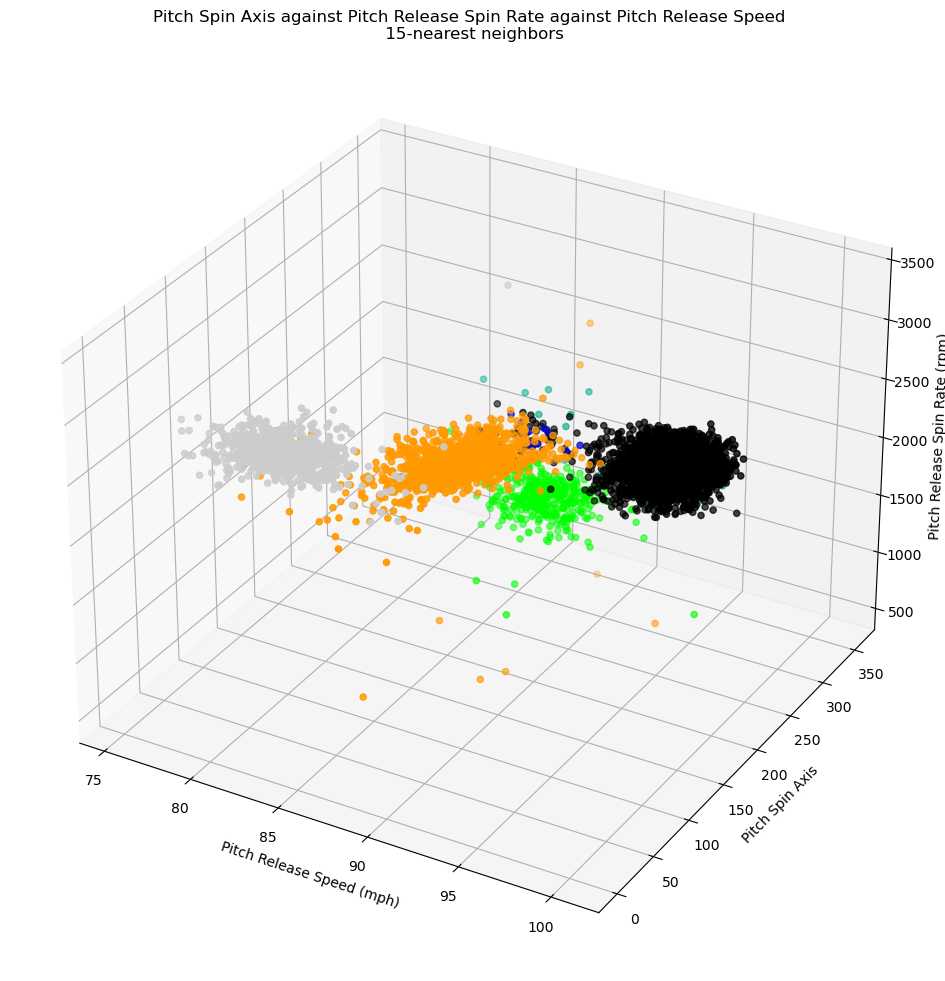

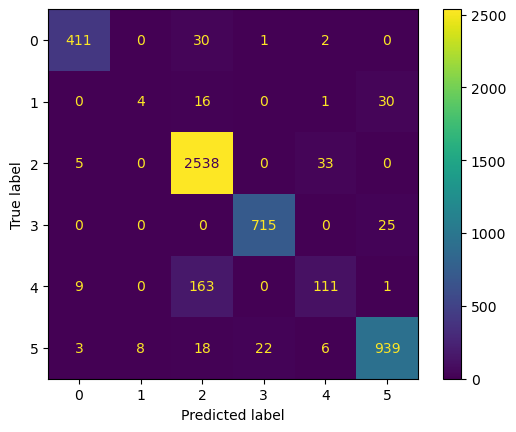

ACCURACY - 92.67334511883716% of samples accurately predicted




In [184]:
for i in range(3,16,3):
    print(f'{i}-nearest neighbours')
    model152 = neighbors.KNeighborsClassifier(n_neighbors = i)
    model152.fit(coleTrainX4,coleTrainY4)
    model152Labels = model152.predict(coleTestX4)
    
    pitchDict = {p:i for i,p in enumerate(set(model152Labels))}

    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(coleTestX4['release_speed'], coleTestX4['spin_axis'], coleTestX4['release_spin_rate'], c = [pitchDict[p] for p in model152Labels], cmap = 'nipy_spectral')
    ax.set_title(f'Pitch Spin Axis against Pitch Release Spin Rate against Pitch Release Speed \n {i}-nearest neighbors')
    ax.set_xlabel('Pitch Release Speed (mph)')
    ax.set_zlabel('Pitch Release Spin Rate (rpm)')
    ax.set_ylabel('Pitch Spin Axis')
    fig.set_size_inches(12, 12)
    plt.show()
    
    printMetrics(coleTestY4Act,model152Labels)
    print()
    print()

After splitting the dataset, I decided to test k-NN with the same number of neighbours thinking it would improve accuracy due to larger sample sizes, however, the black and dark green clusters were very close to each other leading to lower acccuracy across the board, but consistent in regards to k.

## Return to K-Means, tolerance testing

To see how k-NN compares to k-Means, we will test k-Means with multiple cluster numbers in 2D and 3D on the cole and coleExt datasets.

We will also get the silhouette score for every model made, which is the consistency of samples in each cluster, where higher is better.

In [196]:
def runKMeans2D(clusters,tolerance,trainX,trainY,testX,testY,features):
    print('='*70)
    print(f'K-Means clustering ({clusters} clusters, {tolerance} tolerance)')
    model = cluster.KMeans(n_clusters = clusters, tol = tolerance, n_init = 'auto')
    model.fit(trainX,trainY)
    modelLabels = model.predict(testX)

    plt.title(f'{features[0]} against {features[1]},\ngrouped by K-Means clustering ({clusters} clusters, {tolerance} tolerance)')
    plt.scatter(testX[features[0]], testX[features[1]], c = modelLabels, cmap = 'nipy_spectral')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    
    print(f'Silhouette Score:{metrics.silhouette_score(testX,modelLabels)}')
    print()
    

This function allows us to pass through a dataset and model features with a given tolerance and number of clusters to create a model and plot.

K-Means clustering (2 clusters, 1e-06 tolerance)
Silhouette Score:0.7644664253515692

K-Means clustering (2 clusters, 1e-05 tolerance)
Silhouette Score:0.7644664253515692

K-Means clustering (2 clusters, 0.0001 tolerance)
Silhouette Score:0.7644664253515692

K-Means clustering (2 clusters, 0.001 tolerance)
Silhouette Score:0.7659414882167306

K-Means clustering (2 clusters, 0.01 tolerance)
Silhouette Score:0.7644664253515692

K-Means clustering (2 clusters, 0.1 tolerance)
Silhouette Score:0.7644664253515692



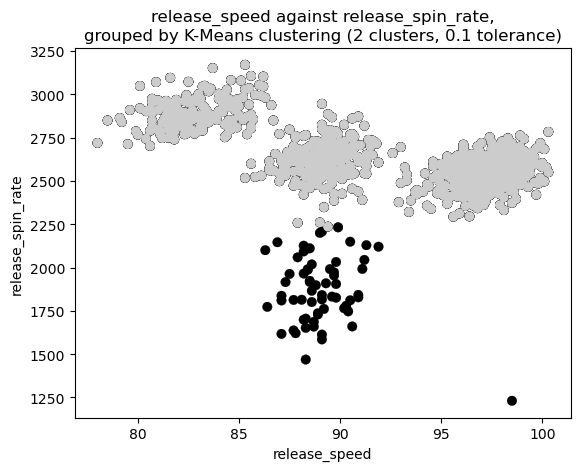

In [197]:
for t in reversed(range(1,7)):
    runKMeans2D(2,10**-t,coleTrainX2,coleTrainY2,coleTestX2,coleTestYAct2,['release_speed','release_spin_rate'])
    

Iterating through all tolerance values from 1e-7 to 0.1 with 2 cluster returns the same silhouette score of 0.76. This is quite good, as it shows the samples are well matched which can be seen on the graph where one cluster is identifed; the other clusters are identified without clustering.

K-Means clustering (3 clusters, 1e-06 tolerance)
Silhouette Score:0.6455853457021209

K-Means clustering (3 clusters, 1e-05 tolerance)
Silhouette Score:0.6477277270081877

K-Means clustering (3 clusters, 0.0001 tolerance)
Silhouette Score:0.6455853457021209

K-Means clustering (3 clusters, 0.001 tolerance)
Silhouette Score:0.6501321671056648

K-Means clustering (3 clusters, 0.01 tolerance)
Silhouette Score:0.642616872653602

K-Means clustering (3 clusters, 0.1 tolerance)
Silhouette Score:0.6486818662098585



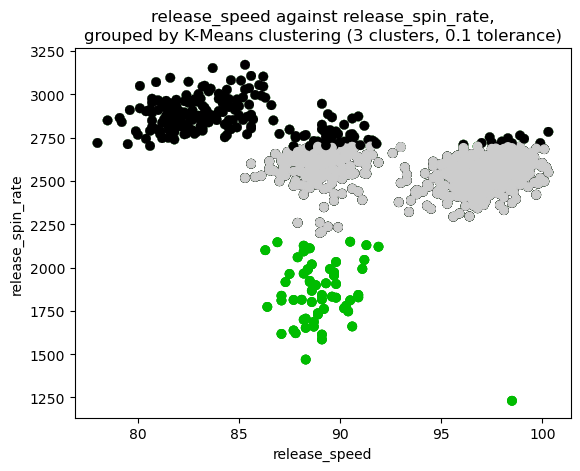

In [198]:
for t in reversed(range(1,7)):
    runKMeans2D(3,10**-t,coleTrainX2,coleTrainY2,coleTestX2,coleTestYAct2,['release_speed','release_spin_rate'])

With 3 clusters, the silhouette score decreases and the cluster beign to 'stripe'.

K-Means clustering (4 clusters, 1e-09 tolerance)
Silhouette Score:0.5264803707005112

K-Means clustering (4 clusters, 1e-08 tolerance)
Silhouette Score:0.5258022683061091

K-Means clustering (4 clusters, 1e-07 tolerance)
Silhouette Score:0.5258022683061091

K-Means clustering (4 clusters, 1e-06 tolerance)
Silhouette Score:0.5264803707005112

K-Means clustering (4 clusters, 1e-05 tolerance)
Silhouette Score:0.5264803707005112

K-Means clustering (4 clusters, 0.0001 tolerance)
Silhouette Score:0.6387408234755267

K-Means clustering (4 clusters, 0.001 tolerance)
Silhouette Score:0.5298379211617413

K-Means clustering (4 clusters, 0.01 tolerance)
Silhouette Score:0.5334307668963427

K-Means clustering (4 clusters, 0.1 tolerance)
Silhouette Score:0.5303985241050916

K-Means clustering (4 clusters, 1 tolerance)
Silhouette Score:0.5332162154308202



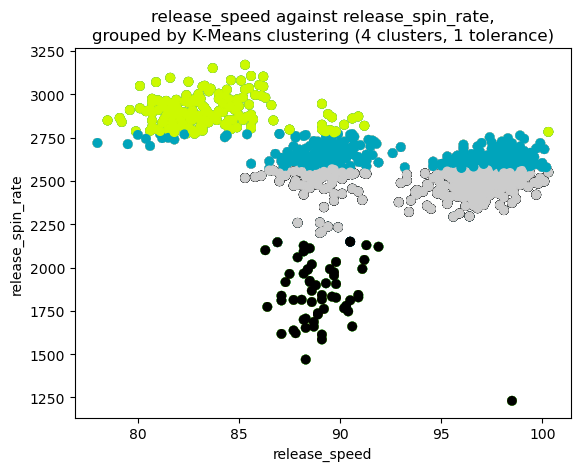

In [199]:
for t in reversed(range(10)):
    runKMeans2D(4,10**-t,coleTrainX2,coleTrainY2,coleTestX2,coleTestYAct2,['release_speed','release_spin_rate'])

With 4 clusters, the silhouette score decreases further and 'striping' further intensifies.

In [191]:
def runKMeans3D(clusters,tolerance,trainX,trainY,testX,testY,features):
    
    model = cluster.KMeans(n_clusters = clusters, tol = tolerance, n_init = 'auto')
    model.fit(trainX)
    modelLabels = model.predict(testX)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(testX[features[0]], testX[features[1]], testX[features[2]], c = modelLabels, cmap = 'nipy_spectral')
    ax.set_title(f'Spin Axis against  Spin Rate against Release Speed \n K-means ({clusters} clusters, {tolerance} tolerance)')
    ax.set_xlabel('Pitch Release Speed (mph)')
    ax.set_zlabel('Pitch Release Spin Rate (rpm)')
    ax.set_ylabel('Pitch Spin Axis')
    fig.set_size_inches(12, 12)
    plt.show()
    
    print(f'Silhouette Score: {metrics.silhouette_score(testX,modelLabels)}')
    print()

To observe the results in 3D, we can create a function that allows us to create a model based on the coleExt dataset and observe it in 3D space.

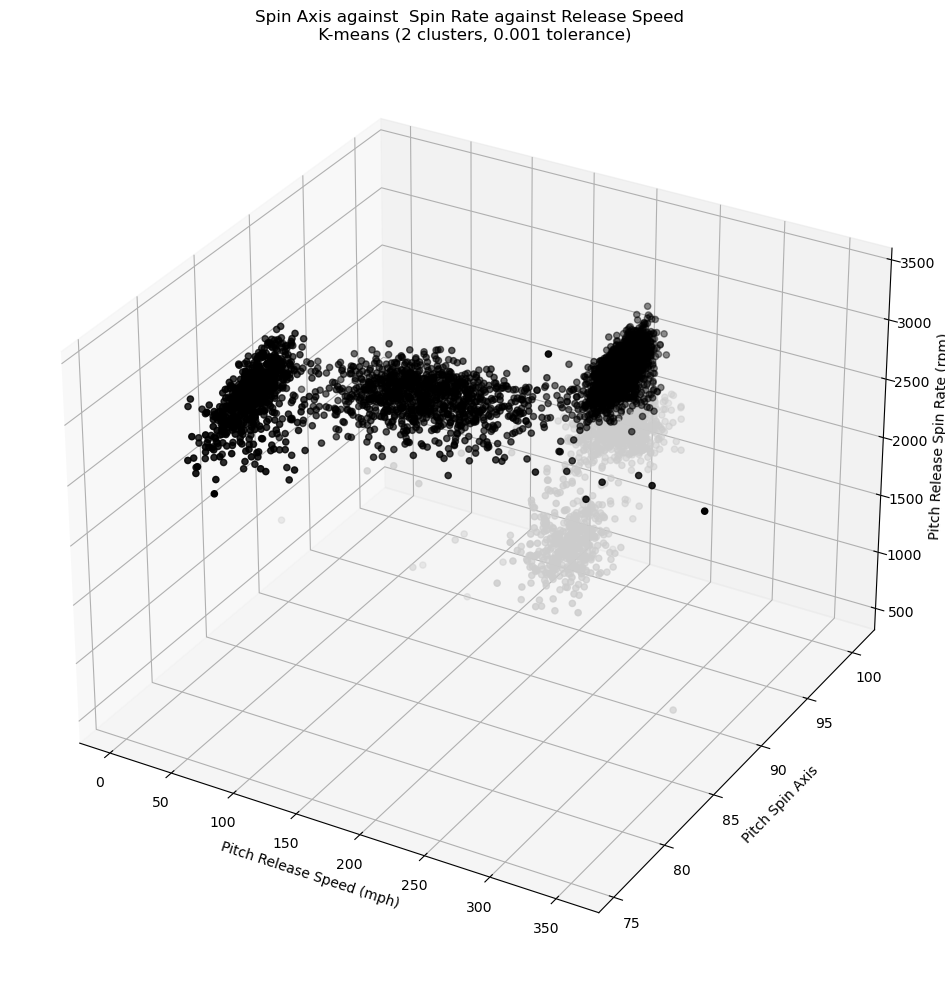

Silhouette Score: 0.5761929725387882



In [193]:
runKMeans3D(2,10**-3,coleTrainX4,coleTrainY4,coleTestX4,coleTestY4Act,['spin_axis','release_speed','release_spin_rate'])

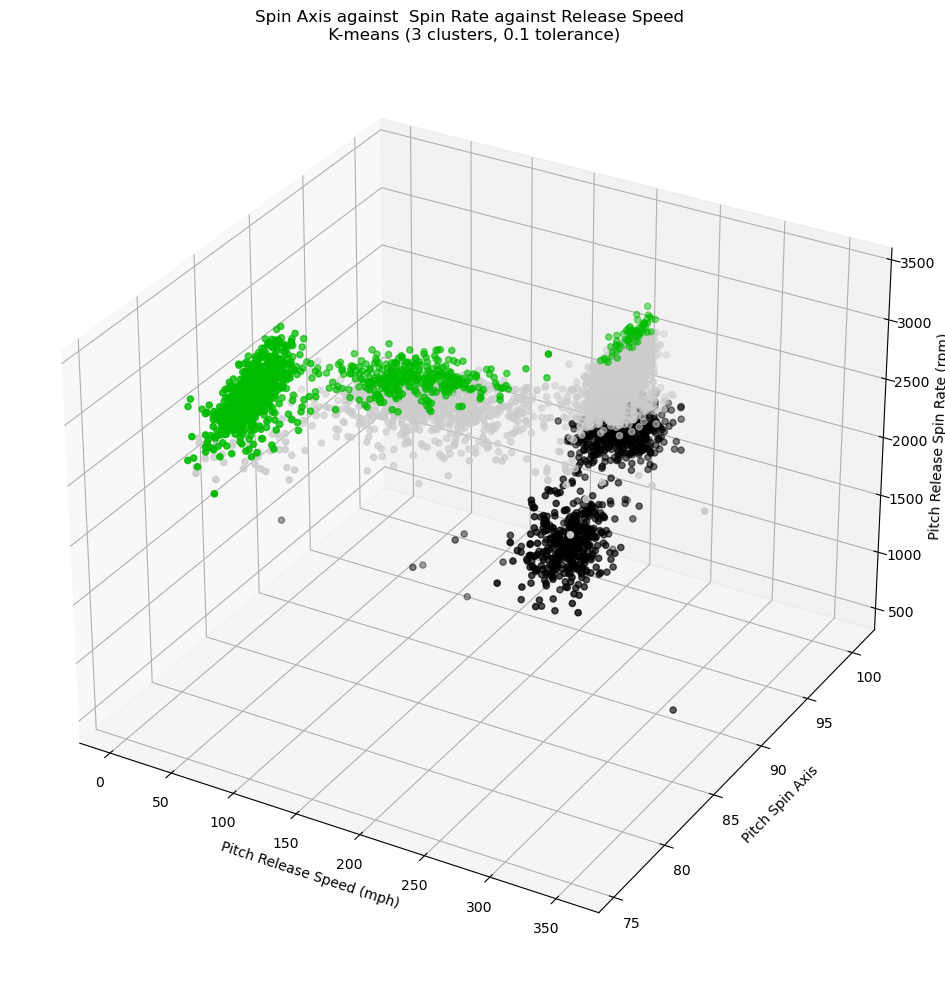

Silhouette Score: 0.49995243230630826



In [192]:
runKMeans3D(3,10**-t,coleTrainX4,coleTrainY4,coleTestX4,coleTestY4Act,['spin_axis','release_speed','release_spin_rate'])

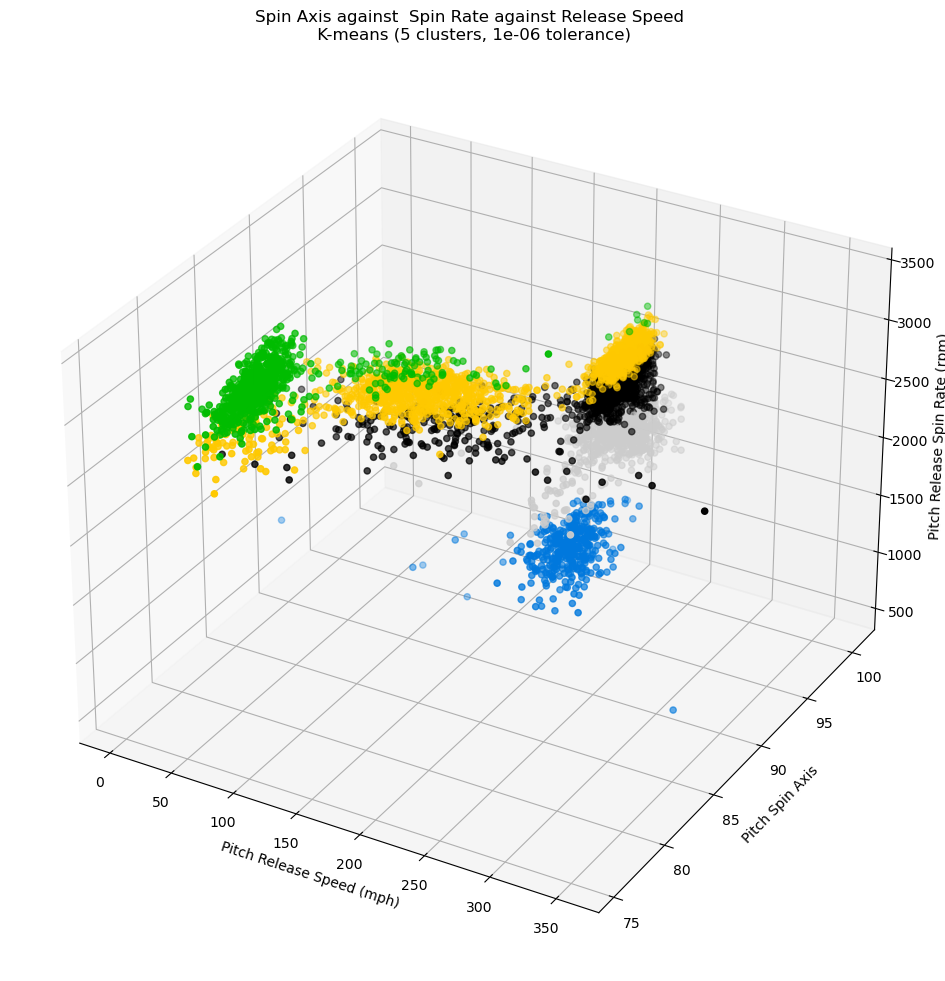

Silhouette Score: 0.4880853017553917



In [194]:
runKMeans3D(5,10**-6,coleTrainX4,coleTrainY4,coleTestX4,coleTestY4Act,['spin_axis','release_speed','release_spin_rate'])

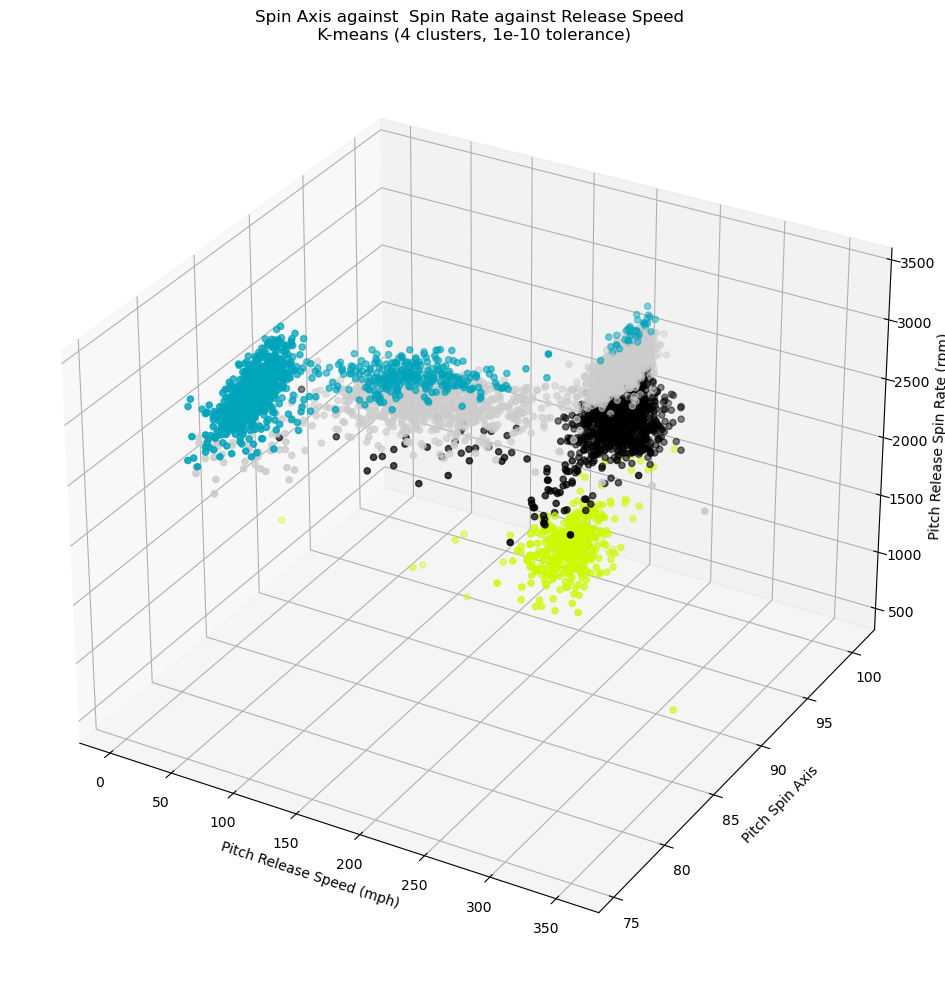

Silhouette Score: 0.5264679889629792



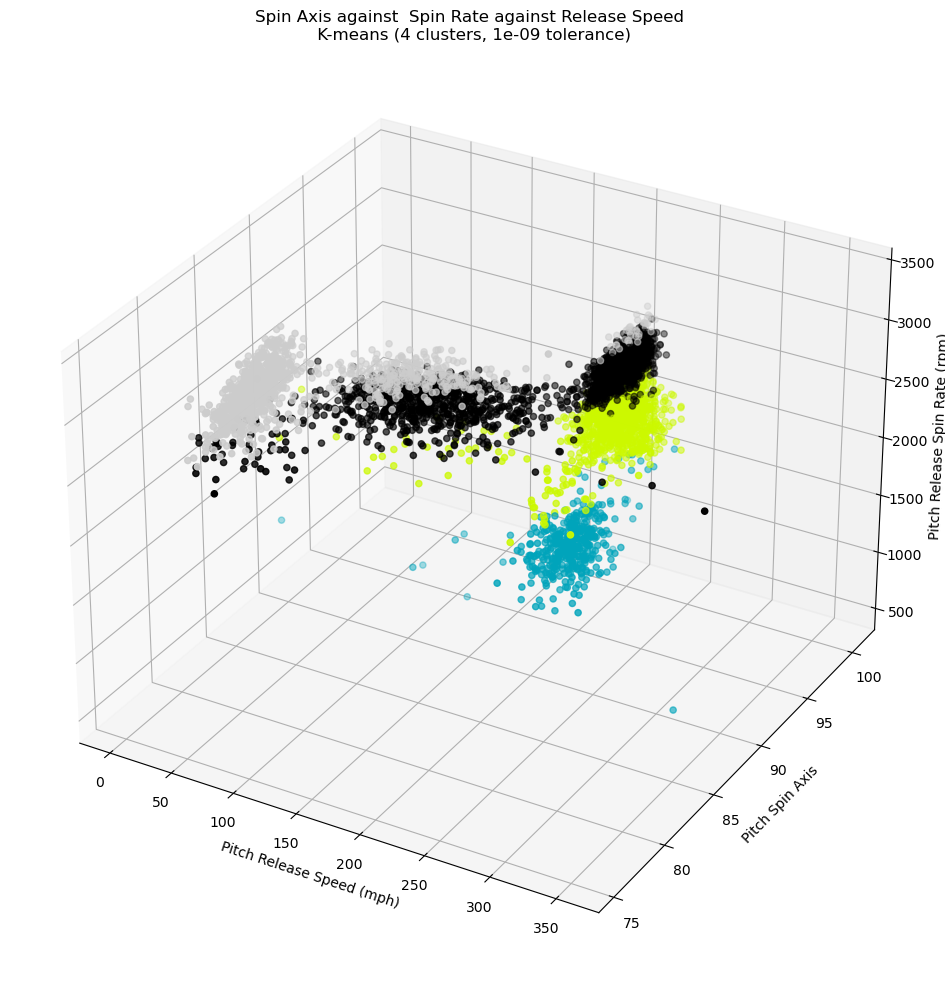

Silhouette Score: 0.5264679889629792



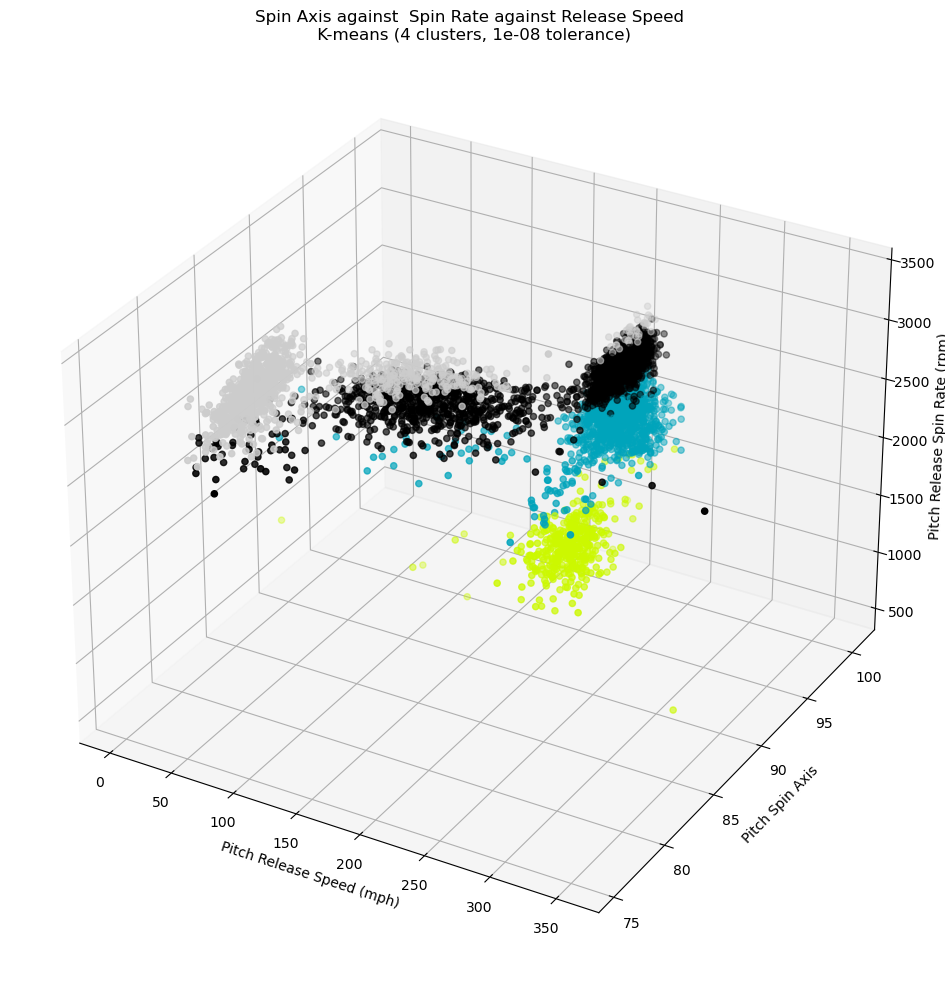

Silhouette Score: 0.5264679889629792



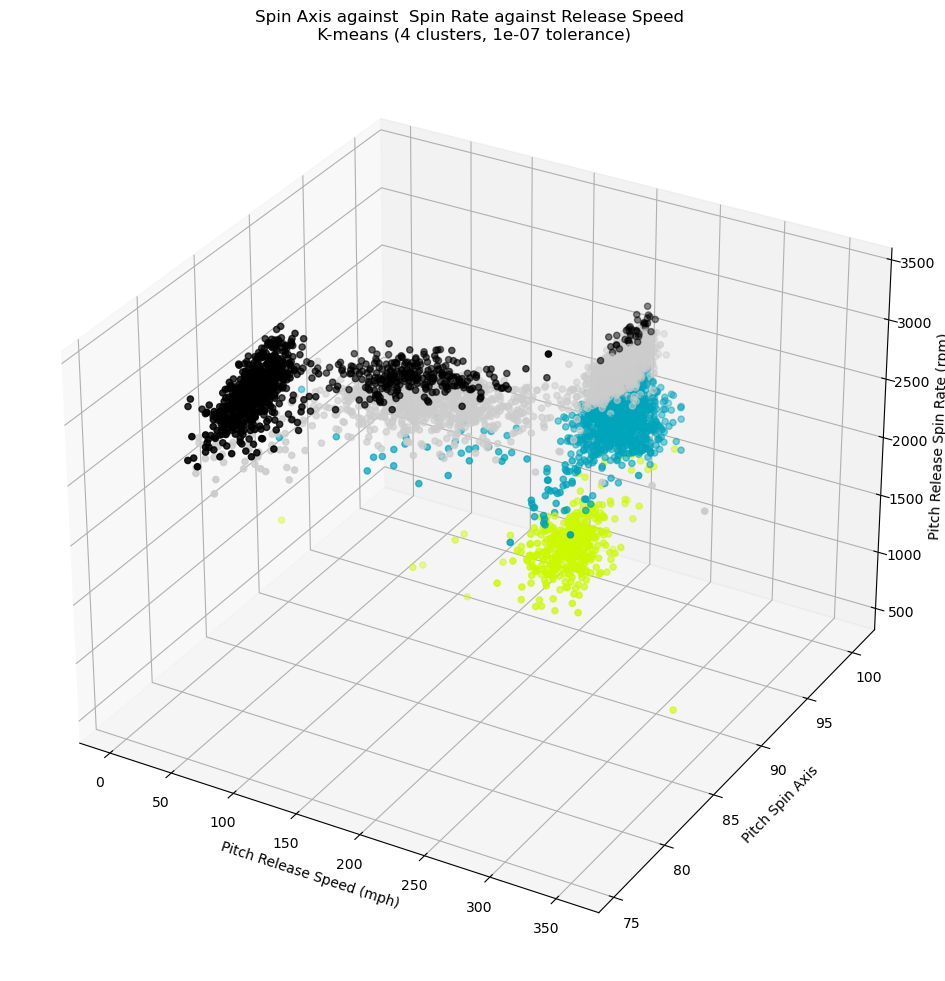

Silhouette Score: 0.5264494874783459



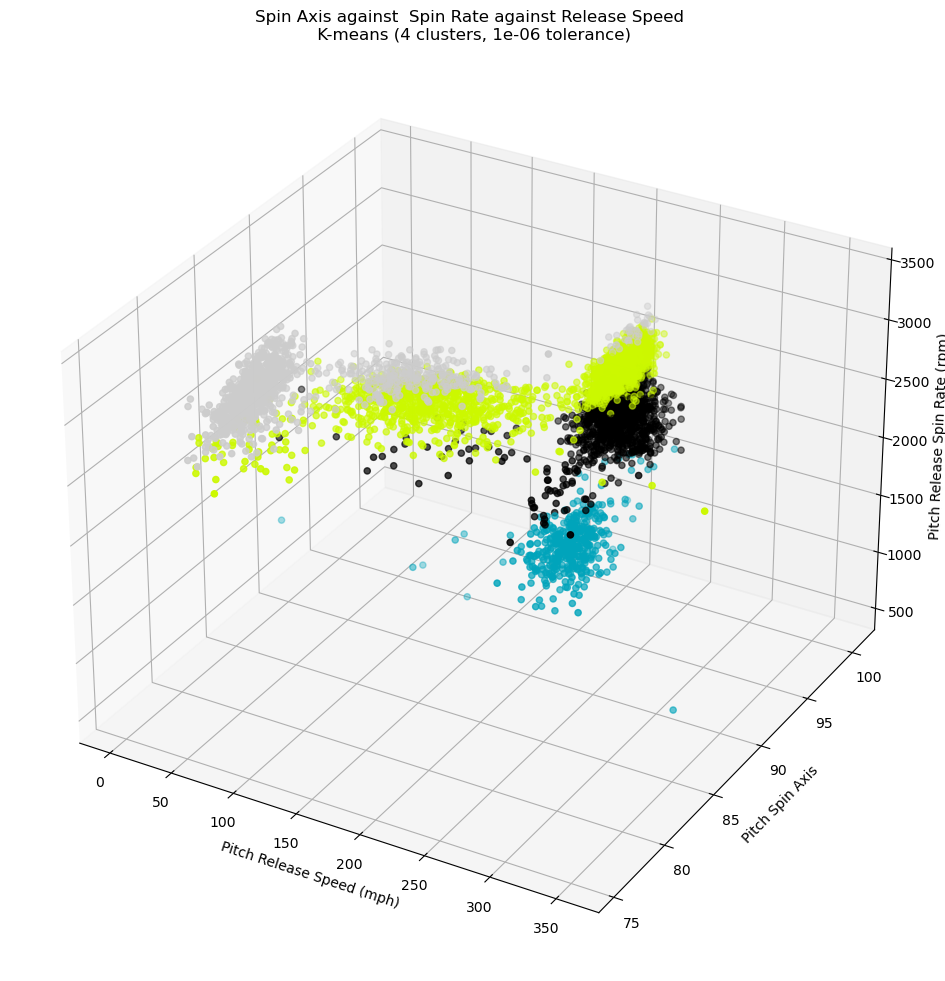

Silhouette Score: 0.5264494874783459



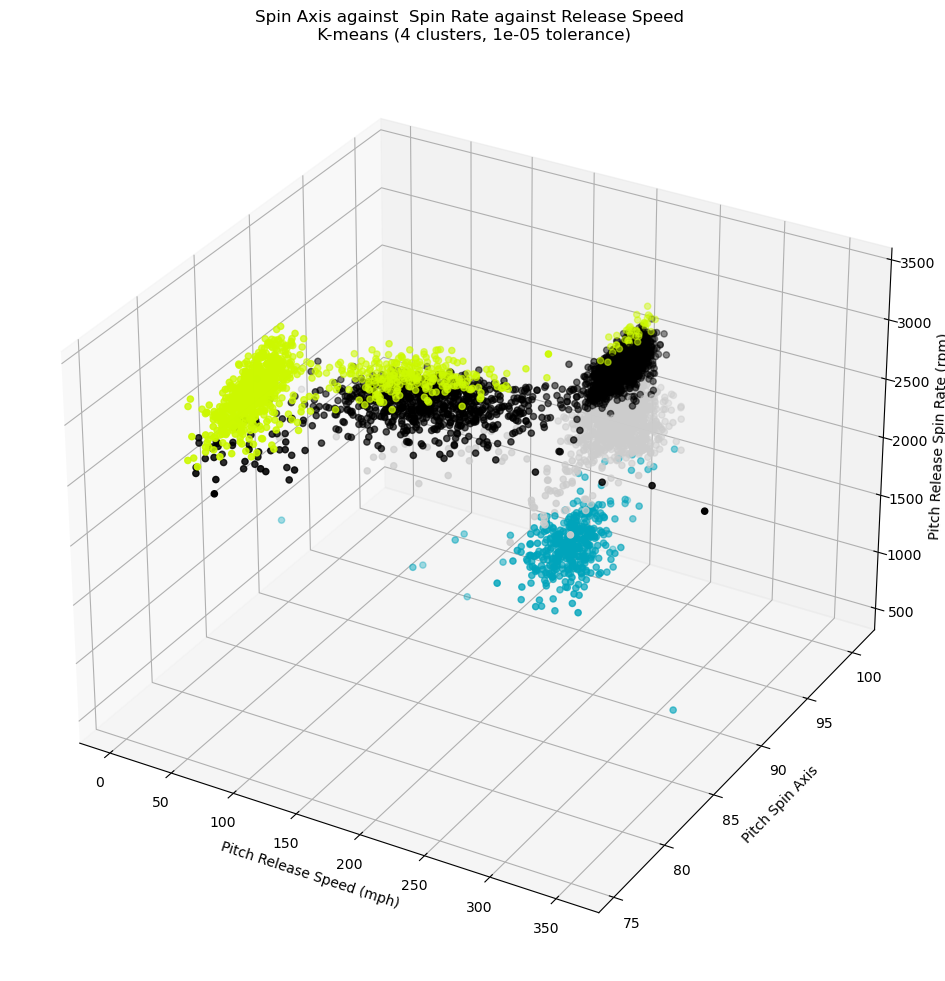

Silhouette Score: 0.5268126087325163



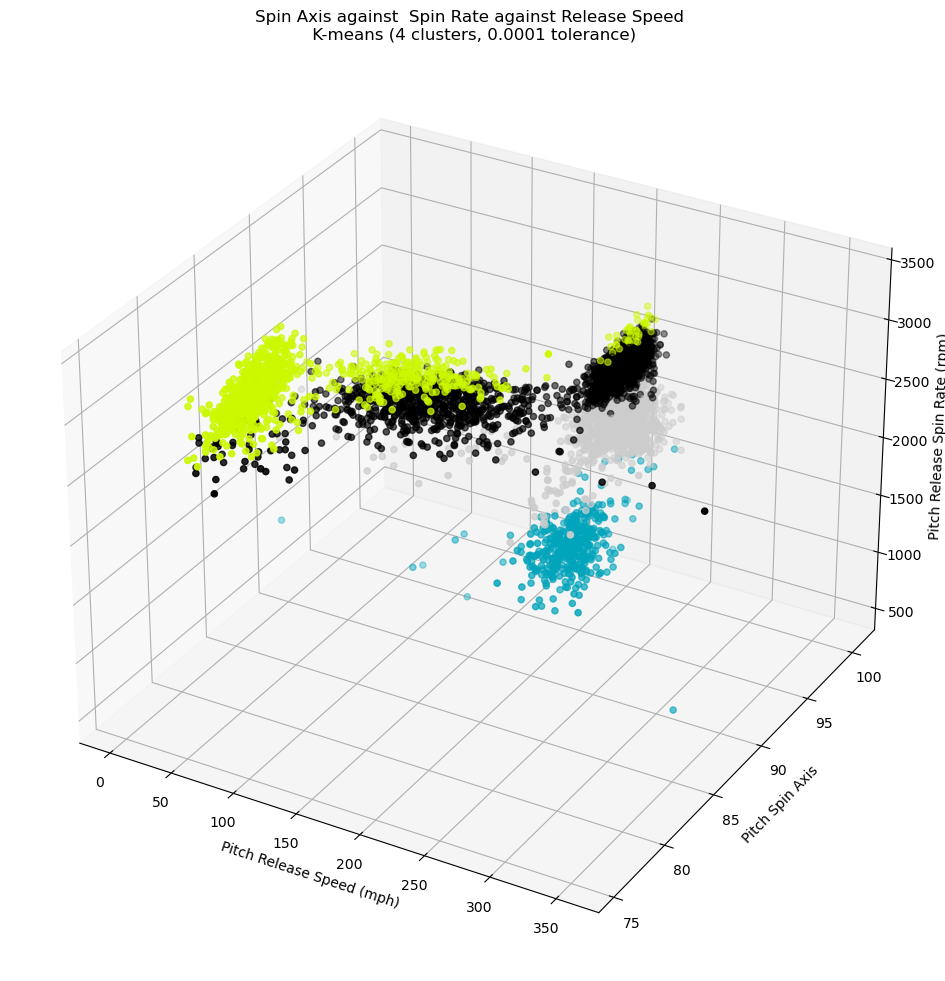

Silhouette Score: 0.5268386405293088



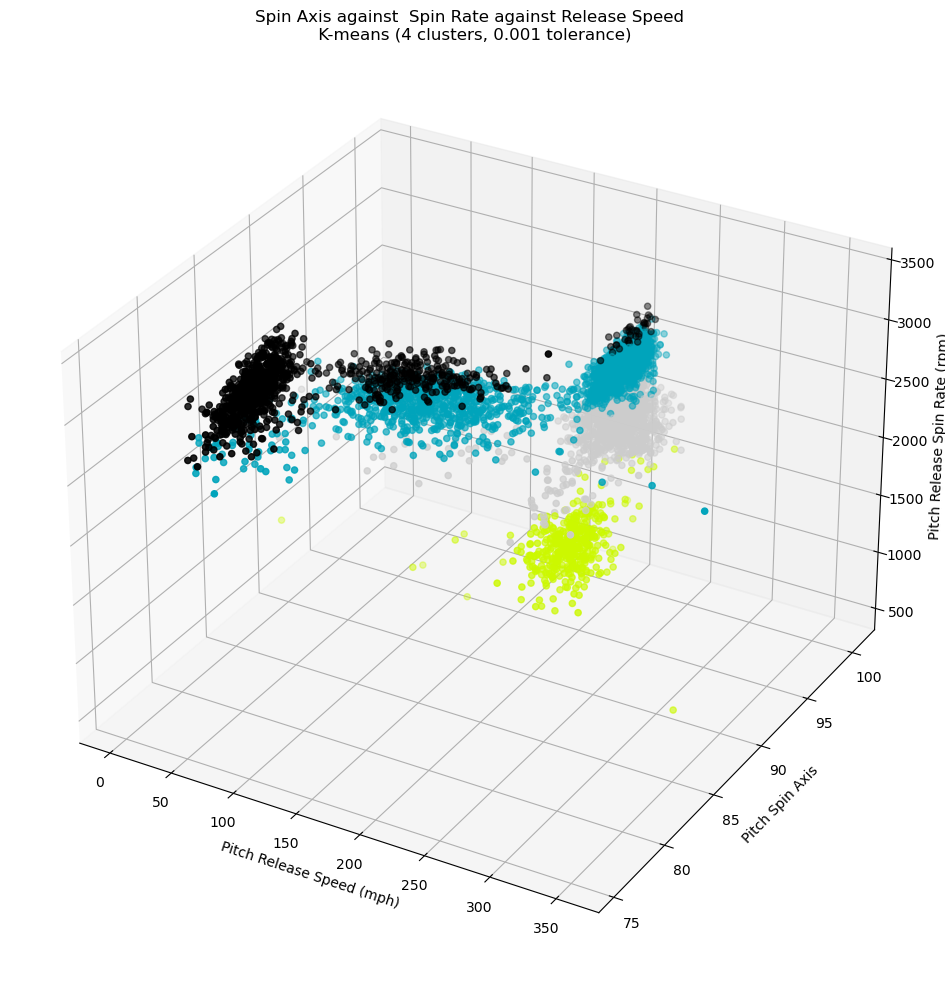

Silhouette Score: 0.5269705881845274



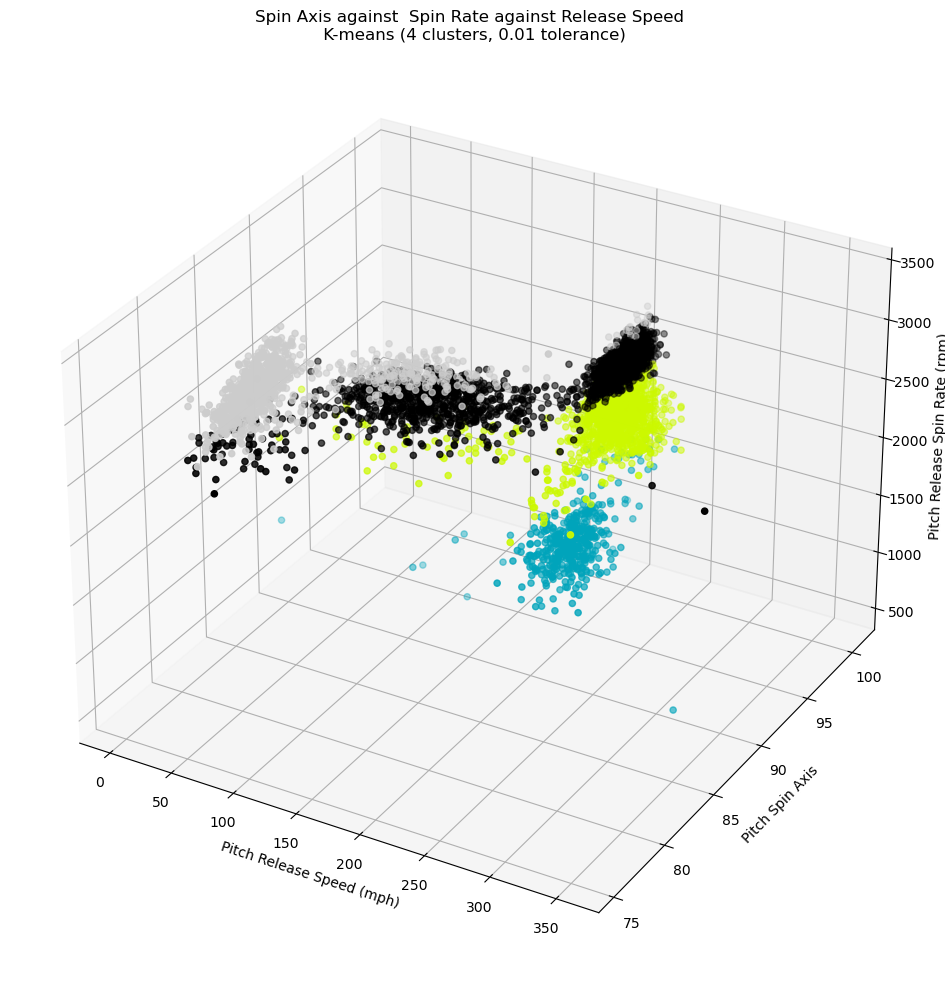

Silhouette Score: 0.5218712422476033



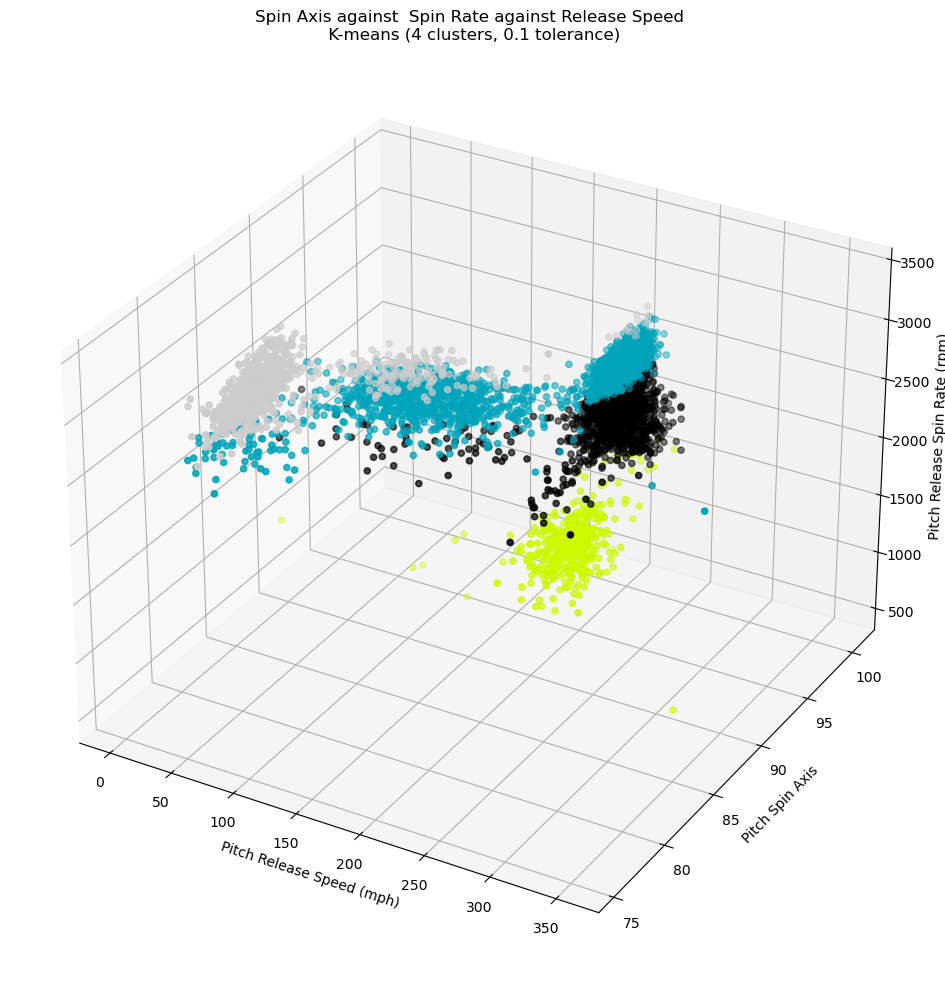

Silhouette Score: 0.5186990223451009



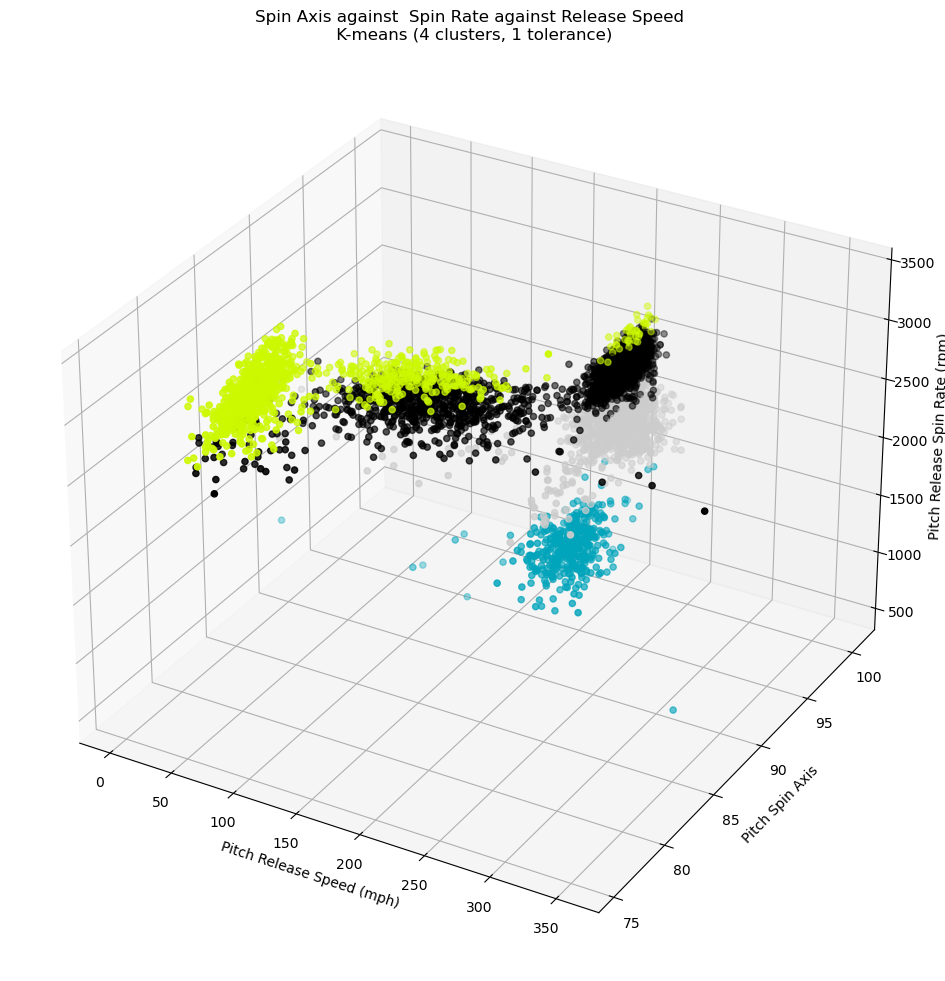

Silhouette Score: 0.5280361741790957



In [195]:
for t in reversed(range(11)):
    runKMeans3D(4,10**-t,coleTrainX4,coleTrainY4,coleTestX4,coleTestY4Act,['spin_axis','release_speed','release_spin_rate'])
    

K-Means appears to perform worse on the coleExt dataset, both in terms of silhouette score and visual inspection. The score on these models are 0.2 lower than the previous models, while the 'striping' phenomenon appears earlier and with greater effect. K-Means appears to work better in fewer dimensions with less clusters.

# Conclusion

The best method for pitch prediction is using K-Nearest neighbors, preferably with 3 to 5 neighbours. This is because it will take the nearest neighbours, so barring outliers the pitch is likely to have attributes close to other pitches of the same type. The accuracy begins to decline with pitchers who can throw multiple types of pitches, because many of them will have the same attributes, and thus they will blend into each other, however, k-NN still performs way better than any unsupervised clustering method, besides perhaps DB Scan.

DB Scan performs fairly well on pitchers with smaller repertoires as there will be clearly defined clusters, which DB Scan identified better than other methods. One common problem with other clustering methods was 'striping', where the clusters striped across multiple clusters on the graph. A reason for this may be the scales of the units, so an algorithm may decide to make clusters with large speed differences because they are closer to each other than different spin rates. In the future, I may have to investigate scaling the units to achieve desired results.